In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import folium

In [60]:
df = pd.read_csv("./mayanSites.csv") #encoding='latin-1')

In [61]:
df.columns

Index(['Name', 'Acronym', 'Country_Area', 'Country_Code', 'Latitude',
       'Longitude'],
      dtype='object')

In [62]:
df.head()

,Name,Acronym,Country_Area,Country_Code,Latitude,Longitude
0,Acanceh,ACC,"Mexiko, Yucatán",MX-YUC,20.813087,-89.45246
1,Acanmul,ACN,"Mexiko, Campeche",MX-CAM,19.90093,-90.3254
2,Acasaguastlan,NaN,"Guatemala, El Progreso",GT-PR,14.928033,-89.962406
3,Acte,ACT,"Guatemala, Petén",GT-PE,17.0755,-89.939
4,Actun Balam,NaN,"Belize, Cayo",BZ-CY,16.45,-88.58


In [63]:
df.shape

(331, 6)

### Cleaning Data
Pre-Cleaning was done in Google Sheets and found few inconsistencies:

- Rows with missing and incorrect Longitude/Latitude
- Missing Acronym Names
- Seperated Country Code and Area

In [64]:
#Dropping Rows with Missing Longitude/Latitude
df.dropna(subset=['Longitude', 'Latitude'], inplace=True)
df.head(15)

,Name,Acronym,Country_Area,Country_Code,Latitude,Longitude
0,Acanceh,ACC,"Mexiko, Yucatán",MX-YUC,20.813087,-89.45246
1,Acanmul,ACN,"Mexiko, Campeche",MX-CAM,19.90093,-90.3254
2,Acasaguastlan,NaN,"Guatemala, El Progreso",GT-PR,14.928033,-89.962406
3,Acte,ACT,"Guatemala, Petén",GT-PE,17.0755,-89.939
4,Actun Balam,NaN,"Belize, Cayo",BZ-CY,16.45,-88.58
5,Actun Ch'on,ATC,"Mexiko, Yucatán",MX-YUC,20.29668,-89.423006
6,Actun Chapat,ACP,"Belize, Cayo",BZ-CY,17.03631,-89.08801
7,Actun Dzib,NaN,"Belize, Toledo",BZ-TOL,16.197779,-89.057019
8,Actun Neko,NaN,"Belize, Cayo",BZ-CY,17.18516,-88.67501
9,Actun Tunichil Muknal,ATM,"Belize, Cayo",BZ-CY,17.11356,-88.86394


In [65]:
#Checking if there are any more rows with Missing Values aside from Acronyms

# Specify the range of columns to check
start_column = 'Country_Area'
end_column = 'Longitude'

# Get the subset of columns within the specified range
columns_to_check = df.loc[:, start_column:end_column]

# Check for null values in the selected columns
null_values = columns_to_check.isnull().values.any()
print(null_values)

False


In [66]:
df['Name'].isnull().values.any()

False

In [67]:
#Dropping Rows with incorrect latitude values 
condition = df['Latitude'].str.contains("'")
df.drop(df[condition].index, inplace=True)
df.head()

,Name,Acronym,Country_Area,Country_Code,Latitude,Longitude
0,Acanceh,ACC,"Mexiko, Yucatán",MX-YUC,20.813087,-89.45246
1,Acanmul,ACN,"Mexiko, Campeche",MX-CAM,19.90093,-90.3254
2,Acasaguastlan,NaN,"Guatemala, El Progreso",GT-PR,14.928033,-89.962406
3,Acte,ACT,"Guatemala, Petén",GT-PE,17.0755,-89.939
4,Actun Balam,NaN,"Belize, Cayo",BZ-CY,16.45,-88.58


In [68]:
#Populating NaN values with N/A at Acronyms
df['Acronym'].fillna("N/A", inplace=True)
df.head(20)

,Name,Acronym,Country_Area,Country_Code,Latitude,Longitude
0,Acanceh,ACC,"Mexiko, Yucatán",MX-YUC,20.813087,-89.45246
1,Acanmul,ACN,"Mexiko, Campeche",MX-CAM,19.90093,-90.3254
2,Acasaguastlan,N/A,"Guatemala, El Progreso",GT-PR,14.928033,-89.962406
3,Acte,ACT,"Guatemala, Petén",GT-PE,17.0755,-89.939
4,Actun Balam,N/A,"Belize, Cayo",BZ-CY,16.45,-88.58
5,Actun Ch'on,ATC,"Mexiko, Yucatán",MX-YUC,20.29668,-89.423006
6,Actun Chapat,ACP,"Belize, Cayo",BZ-CY,17.03631,-89.08801
7,Actun Dzib,N/A,"Belize, Toledo",BZ-TOL,16.197779,-89.057019
8,Actun Neko,N/A,"Belize, Cayo",BZ-CY,17.18516,-88.67501
9,Actun Tunichil Muknal,ATM,"Belize, Cayo",BZ-CY,17.11356,-88.86394


In [69]:
# Split the "Country_Area" column into "Country" and "State" columns
df[['Country', 'State']] = df['Country_Area'].str.split(',', 1, expand=True)

#Remove leading/trailing whitespace from the "State" column
df['State'] = df['State'].str.strip()

# Move the new columns beside "Country_Area"
df.insert(df.columns.get_loc('Country_Area') + 1, 'Country', df.pop('Country'))
df.insert(df.columns.get_loc('Country_Area') + 2, 'State', df.pop('State'))
df.head(20)

C:\Users\dmqui\AppData\Local\Temp\ipykernel_16456\1907359969.py:2: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  df[['Country', 'State']] = df['Country_Area'].str.split(',', 1, expand=True)


,Name,Acronym,Country_Area,Country,State,Country_Code,Latitude,Longitude
0,Acanceh,ACC,"Mexiko, Yucatán",Mexiko,Yucatán,MX-YUC,20.813087,-89.45246
1,Acanmul,ACN,"Mexiko, Campeche",Mexiko,Campeche,MX-CAM,19.90093,-90.3254
2,Acasaguastlan,N/A,"Guatemala, El Progreso",Guatemala,El Progreso,GT-PR,14.928033,-89.962406
3,Acte,ACT,"Guatemala, Petén",Guatemala,Petén,GT-PE,17.0755,-89.939
4,Actun Balam,N/A,"Belize, Cayo",Belize,Cayo,BZ-CY,16.45,-88.58
5,Actun Ch'on,ATC,"Mexiko, Yucatán",Mexiko,Yucatán,MX-YUC,20.29668,-89.423006
6,Actun Chapat,ACP,"Belize, Cayo",Belize,Cayo,BZ-CY,17.03631,-89.08801
7,Actun Dzib,N/A,"Belize, Toledo",Belize,Toledo,BZ-TOL,16.197779,-89.057019
8,Actun Neko,N/A,"Belize, Cayo",Belize,Cayo,BZ-CY,17.18516,-88.67501
9,Actun Tunichil Muknal,ATM,"Belize, Cayo",Belize,Cayo,BZ-CY,17.11356,-88.86394


### Analysing the Data
From the Dataset we can form fictional problem statements such as:
- Which country has the highest number of archaeological sites?
- Which region has the highest concentration of sites?
- Is there any correlation between site size and distribution of sites?


### Which country has the highest number of archaeological sites?

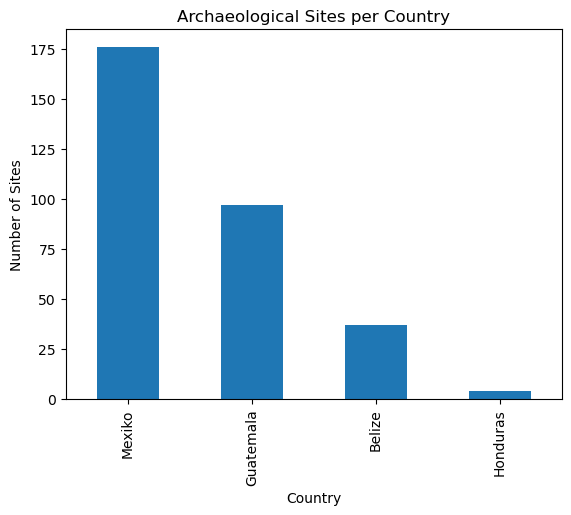

In [70]:
#Count number of country
country_counts = df['Country'].value_counts()

# Plot the number of sites per country
country_counts.plot(kind='bar')

# Set plot labels and title
plt.xlabel('Country')
plt.ylabel('Number of Sites')
plt.title('Archaeological Sites per Country')

# Display the plot
plt.show()

### Which region has the highest concentration of sites?

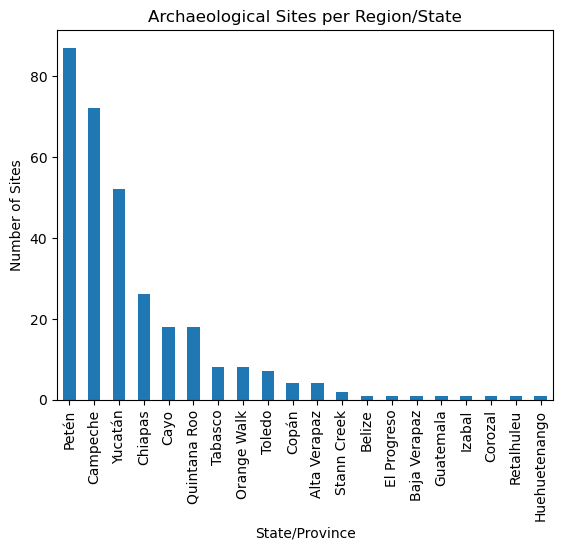

In [71]:
site_counts = df['State'].value_counts()

site_counts.plot(kind='bar')

plt.xlabel('State/Province')
plt.ylabel('Number of Sites')
plt.title('Archaeological Sites per Region/State')

plt.show()

### Is there any correlation between site size and distribution of sites?

In [91]:
# Create the map object with a specified location and zoom level
site_map = folium.Map(location=[15.769, -90.6024], tiles='stamenterrain', zoom_start= 8)

# Create a heatmap overlay using the latitude and longitude coordinates from the DataFrame
heatmap_data = df[['Latitude', 'Longitude']].dropna()  # Remove any rows with missing coordinates
HeatMap(data=heatmap_data, radius=30).add_to(site_map)


title_html = '<h3>Archaeological Site Distribution in Central America</h3>'
site_map.get_root().html.add_child(folium.Element(title_html))

# Display the map
site_map
